# Download Google Trends Data

In [1]:
!pip install pytrends

In [2]:
import numpy as np
import pandas as pd
import pytrends
import statsmodels.api as sm
import time

In [3]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl = "en-US", tz = 0, retries = 10)

In [4]:
# Keywords
keywords = ["Cryptocurrency", "Crackdown", "Crypto", "Blockchain", "Digital currency", "Crypto Mining", "DeFi", 
            "Altcoins", "Smart contracts", "Stablecoin", "Bittrex", "Coinbase", "Vitalik", "Satoshi", 
            "Cryptocurrency regulation", "Gary Gensler", "Tesla", "Elon Musk", "Whales", "Decentralised finance", 
            "Distributed ledger", "Halving", "ICO", "China Digital Currency"]

# Sort the list
keywords.sort()

Repeat until all trend data needed has been pulled

In [5]:
# Perform searches
wait = 6 # in seconds
print("Number of queries to do: ", len(keywords))

# Prepare containers
errors_list = []
cnt = 1

# Start loops
trends = {}
for k in keywords:
    try:
        time.sleep(wait)
        pytrends.build_payload([k], timeframe = "2017-12-31 2022-05-31", gprop = "")
        trends[k] = pytrends.interest_over_time()[k]
        print(cnt, "Success: ", k)
    except:
        print(cnt, ") Error: & ", k)
        errors_list.append([k])
    cnt += 1
print("\nDone -", len(errors_list), "errors left")

Number of queries to do:  24
1 Success:  Altcoins
2 Success:  Bittrex
3 Success:  Blockchain
4 Success:  China Digital Currency
5 Success:  Coinbase
6 Success:  Crackdown
7 Success:  Crypto
8 Success:  Crypto Mining
9 Success:  Cryptocurrency
10 Success:  Cryptocurrency regulation
11 Success:  DeFi
12 Success:  Decentralised finance
13 Success:  Digital currency
14 Success:  Distributed ledger
15 Success:  Elon Musk
16 Success:  Gary Gensler
17 Success:  Halving
18 Success:  ICO
19 Success:  Satoshi
20 Success:  Smart contracts
21 Success:  Stablecoin
22 Success:  Tesla
23 Success:  Vitalik
24 Success:  Whales

Done - 0 errors left


In [6]:
dict_of_trends = {g: pd.DataFrame(k) for g, k in trends.items()}
data_df = pd.concat(dict_of_trends, axis = 1)
data_df.to_csv("trends.csv", index = True)
data_df

,Altcoins,Bittrex,Blockchain,China Digital Currency,Coinbase,Crackdown,Crypto,Crypto Mining,Cryptocurrency,Cryptocurrency regulation,...,Elon Musk,Gary Gensler,Halving,ICO,Satoshi,Smart contracts,Stablecoin,Tesla,Vitalik,Whales
,Altcoins,Bittrex,Blockchain,China Digital Currency,Coinbase,Crackdown,Crypto,Crypto Mining,Cryptocurrency,Cryptocurrency regulation,...,Elon Musk,Gary Gensler,Halving,ICO,Satoshi,Smart contracts,Stablecoin,Tesla,Vitalik,Whales
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,100,100,86,1,46,9,31,41,100,41,...,4,0,1,65,100,32,0,25,11,56
2018-01-07,99,77,100,2,31,8,33,45,100,54,...,3,1,1,100,95,38,1,25,12,67
2018-01-14,58,41,88,1,23,8,29,36,91,73,...,3,1,1,85,76,32,1,23,11,63
2018-01-21,32,24,76,2,13,10,21,34,55,46,...,3,0,1,76,60,33,1,24,8,65
2018-01-28,29,21,71,1,13,10,20,32,59,47,...,8,1,1,70,54,35,1,24,7,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,9,1,28,3,10,5,30,34,13,27,...,34,6,2,9,38,28,17,50,6,59
2022-05-08,10,2,33,5,22,5,66,27,31,15,...,26,8,4,10,42,27,100,49,5,58


# Cryptocurrency Prices (obtained from Binance)

In [7]:
training_data = pd.read_csv("crypto_training.csv", index_col = "date")
training_data

,BTC,BNB,LINK,LTC,XMR,XRP
date,,,,,,
1/1/18,13380.00,8.4500,0.00,222.61,0.0,0.0000
2/1/18,14675.11,8.7150,0.00,247.33,0.0,0.0000
3/1/18,14919.51,9.3040,0.00,238.77,0.0,0.0000
4/1/18,15059.54,9.1430,0.00,233.00,0.0,0.0000
5/1/18,16960.39,14.8908,0.00,240.54,0.0,0.0000
...,...,...,...,...,...,...
27/5/22,28629.80,301.6000,6.29,61.60,180.9,0.3819
28/5/22,29031.33,307.5000,6.58,63.00,176.0,0.3863
29/5/22,29468.10,305.8000,6.71,63.60,186.0,0.3891


In [8]:
test_data = pd.read_csv("crypto_test.csv", index_col = "date")
test_data

,ETH,BCH,DOGE,ADA
date,,,,
1/1/18,754.99,0.0,0.00000,0.0000
2/1/18,855.28,0.0,0.00000,0.0000
3/1/18,934.03,0.0,0.00000,0.0000
4/1/18,940.00,0.0,0.00000,0.0000
5/1/18,959.30,0.0,0.00000,0.0000
...,...,...,...,...
27/5/22,1727.27,174.8,0.08160,0.4566
28/5/22,1792.22,178.7,0.08180,0.4646
29/5/22,1813.64,185.2,0.08270,0.4820


# Data Cleaning

## Google Trends

Normalise daily data by monthly/weekly data

In [9]:
trends_normalised = pd.read_csv("trends_normalised.csv", index_col = "Date")
trends_normalised

,Altcoins,Bittrex,Blockchain,China Digital Currency,Coinbase,Crackdown,Crypto,Crypto Mining,Cryptocurrency,Cryptocurrency regulation,...,Elon Musk,Gary Gensler,Halving,ICO,Satoshi,Smart contracts,Stablecoin,Tesla,Vitalik,Whales
Date,,,,,,,,,,,,,,,,,,,,,
1/1/2018,50.00,55.00,42.14,0.00,18.40,2.07,14.26,24.36,44.55,0.00,...,0.20,0.00,0.18,26.65,69.00,12.21,0.00,5.50,6.05,20.72
2/1/2018,63.00,68.00,66.22,0.00,27.14,1.53,17.36,22.26,52.47,9.89,...,0.20,0.00,0.31,35.75,75.00,21.45,0.00,5.50,6.49,19.60
3/1/2018,81.00,77.00,73.96,0.00,36.34,1.80,21.39,29.40,62.37,9.46,...,0.24,0.00,0.18,41.60,76.00,19.14,0.00,6.00,8.36,19.04
4/1/2018,91.00,100.00,72.24,0.48,46.00,2.70,24.18,33.18,83.16,16.34,...,0.20,0.00,0.27,41.60,80.00,28.05,0.00,6.25,8.58,19.60
5/1/2018,80.00,81.00,69.66,0.00,34.96,3.06,22.94,34.44,68.31,9.46,...,0.24,0.00,0.28,41.60,85.00,24.09,0.00,5.50,7.81,20.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/5/22,1.26,0.20,16.24,0.48,1.44,1.15,7.75,5.28,2.70,0.90,...,1.80,0.55,0.50,6.12,6.40,1.47,2.42,26.00,1.02,34.72
28/5/22,0.56,0.31,12.76,0.00,1.08,0.85,7.13,6.16,5.40,0.00,...,1.80,0.55,0.50,4.77,6.40,0.63,2.64,21.50,0.60,36.96
29/5/22,0.91,0.19,11.88,0.00,0.88,0.42,6.16,7.80,2.34,4.90,...,1.89,0.20,0.64,3.20,5.60,0.92,1.62,19.20,0.52,47.56


## Cryptocurrency

In [10]:
training_return = np.log(training_data).diff()
test_return = np.log(test_data).diff()
gtrend_return = trends_normalised.diff()

# Datasets

In [11]:
training_set = pd.DataFrame(pd.concat([training_return[i] for i in training_data.columns]))
training_set.replace([np.inf], np.nan, inplace = True)
training_set.dropna(inplace = True)
training_set

,0
date,
2/1/18,0.092392
3/1/18,0.016517
4/1/18,0.009342
5/1/18,0.118869
6/1/18,0.006430
...,...
27/5/22,-0.026103
28/5/22,0.011455
29/5/22,0.007222


In [12]:
combined_training = pd.merge(training_set, gtrend_return, left_index = True, right_index = True)
combined_training = pd.read_csv("combined_training.csv", index_col = "Date")
combined_training

,Return,Altcoins,Bittrex,Blockchain,China Digital Currency,Coinbase,Crackdown,Crypto,Crypto Mining,Cryptocurrency,...,Elon Musk,Gary Gensler,Halving,ICO,Satoshi,Smart contracts,Stablecoin,Tesla,Vitalik,Whales
Date,,,,,,,,,,,,,,,,,,,,,
2/1/18,0.092392,13.00,13.00,24.08,0.00,8.74,-0.54,3.10,-2.10,7.92,...,0.00,0.00,0.13,9.10,6.00,9.24,0.00,0.00,0.44,-1.12
3/1/18,0.016517,18.00,9.00,7.74,0.00,9.20,0.27,4.03,7.14,9.90,...,0.04,0.00,-0.13,5.85,1.00,-2.31,0.00,0.50,1.87,-0.56
4/1/18,0.009342,10.00,23.00,-1.72,0.48,9.66,0.90,2.79,3.78,20.79,...,-0.04,0.00,0.09,0.00,4.00,8.91,0.00,0.25,0.22,0.56
5/1/18,0.118869,-11.00,-19.00,-2.58,-0.48,-11.04,0.36,-1.24,1.26,-14.85,...,0.04,0.00,0.01,0.00,5.00,-3.96,0.00,-0.75,-0.77,0.56
6/1/18,0.006430,-3.00,3.00,-7.74,0.54,-5.98,-1.53,-0.93,7.14,-5.94,...,0.00,0.00,-0.14,-0.65,14.00,-4.62,0.00,0.25,2.20,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/5/22,-0.026103,0.70,-0.06,-0.58,0.00,0.09,0.05,0.00,-0.44,-0.18,...,0.00,0.22,-0.18,-0.27,-1.20,0.00,-0.66,-0.50,0.42,0.00
28/5/22,0.011455,-0.70,0.11,-3.48,-0.48,-0.36,-0.30,-0.62,0.88,2.70,...,0.00,0.00,0.00,-1.35,0.00,-0.84,0.22,-4.50,-0.42,2.24
29/5/22,0.007222,0.35,-0.12,-0.88,0.00,-0.20,-0.43,-0.97,1.64,-3.06,...,0.09,-0.35,0.14,-1.57,-0.80,0.29,-1.02,-2.30,-0.08,10.60


In [13]:
eth = pd.read_csv("eth_return.csv", index_col = "Date")
bch = pd.read_csv("bch_return.csv", index_col = "Date")
doge = pd.read_csv("doge_return.csv", index_col = "Date")
ada = pd.read_csv("ada_return.csv", index_col = "Date")

# OLS Model

In [14]:
ols = sm.OLS(combined_training["Return"], sm.add_constant(combined_training[keywords]), missing = "drop").fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     22.62
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           3.55e-96
Time:                        15:09:26   Log-Likelihood:                 12920.
No. Observations:                8725   AIC:                        -2.579e+04
Df Residuals:                    8700   BIC:                        -2.561e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/Users/nicolelim/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
eth_ols = ols.predict(eth)
bch_ols = ols.predict(bch)
doge_ols = ols.predict(doge)
ada_ols = ols.predict(ada)

## Backtesting

In [16]:
percentile_25 = eth_ols.describe(percentiles = [0.25, 0.5, 0.75])[4]
percentile_75 = eth_ols.describe(percentiles = [0.25, 0.5, 0.75])[6]

def change_sign(x):
    if x < percentile_25:
        return 1
    elif x > percentile_75:
        return -1
    else:
        return 0

<AxesSubplot:xlabel='Date'>

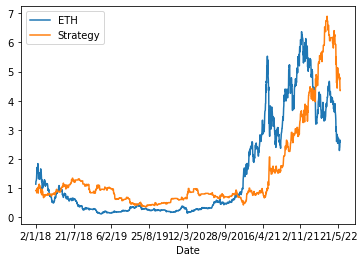

In [17]:
eth["Sign"] = eth_ols.apply(change_sign)
eth["Strategy"] = eth["Sign"].shift(1) * eth["ETH"]
eth[["ETH", "Strategy"]].cumsum().apply(np.exp).plot()

In [18]:
(eth[["ETH", "Strategy"]].dropna().cumsum().apply(np.exp)-1).iloc[-1]

ETH         1.270484
Strategy    3.349508
Name: 31/5/22, dtype: float64

In [19]:
daily_returns = eth["Strategy"].apply(np.exp)-1
np.sqrt(365) * (daily_returns.mean() / daily_returns.std())

0.8124825672994244

In [20]:
percentile_25 = bch_ols.describe(percentiles = [0.25, 0.5, 0.75])[4]
percentile_75 = bch_ols.describe(percentiles = [0.25, 0.5, 0.75])[6]

<AxesSubplot:xlabel='Date'>

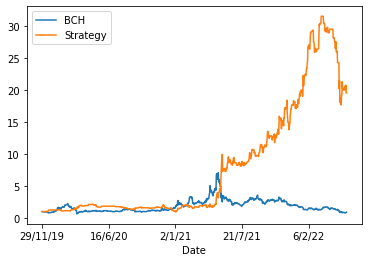

In [21]:
bch["Sign"] = bch_ols.apply(change_sign)
bch["Strategy"] = bch["Sign"].shift(1) * bch["BCH"]
bch[["BCH", "Strategy"]].cumsum().apply(np.exp).plot()

In [22]:
(bch[["BCH", "Strategy"]].dropna().cumsum().apply(np.exp)-1).iloc[-1]

BCH         -0.086607
Strategy    18.574309
Name: 31/5/22, dtype: float64

In [23]:
daily_returns = bch["Strategy"].apply(np.exp)-1
np.sqrt(365) * (daily_returns.mean() / daily_returns.std())

1.6927027513794968

In [24]:
percentile_25 = doge_ols.describe(percentiles = [0.25, 0.5, 0.75])[4]
percentile_75 = doge_ols.describe(percentiles = [0.25, 0.5, 0.75])[6]

<AxesSubplot:xlabel='Date'>

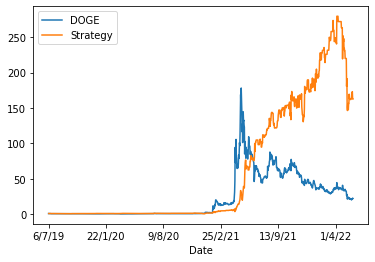

In [25]:
doge["Sign"] = doge_ols.apply(change_sign)
doge["Strategy"] = doge["Sign"].shift(1) * doge["DOGE"]
doge[["DOGE", "Strategy"]].cumsum().apply(np.exp).plot()

In [26]:
(doge[["DOGE", "Strategy"]].dropna().cumsum().apply(np.exp)-1).iloc[-1]

DOGE         23.545714
Strategy    161.669608
Name: 31/5/22, dtype: float64

In [27]:
daily_returns = doge["Strategy"].apply(np.exp)-1
np.sqrt(365) * (daily_returns.mean() / daily_returns.std())

1.891110342805337

In [28]:
percentile_25 = ada_ols.describe(percentiles = [0.25, 0.5, 0.75])[4]
percentile_75 = ada_ols.describe(percentiles = [0.25, 0.5, 0.75])[6]

<AxesSubplot:xlabel='Date'>

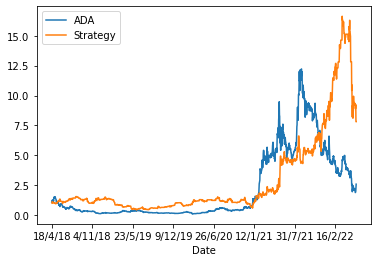

In [29]:
ada["Sign"] = ada_ols.apply(change_sign)
ada["Strategy"] = ada["Sign"].shift(1) * ada["ADA"]
ada[["ADA", "Strategy"]].cumsum().apply(np.exp).plot()

In [30]:
(ada[["ADA", "Strategy"]].dropna().cumsum().apply(np.exp)-1).iloc[-1]

ADA         1.392366
Strategy    6.814381
Name: 31/5/22, dtype: float64

In [31]:
daily_returns = ada["Strategy"].apply(np.exp)-1
np.sqrt(365) * (daily_returns.mean() / daily_returns.std())

1.0017078222932965

In [32]:
strategy_returns = pd.concat([eth["Strategy"], bch["Strategy"], doge["Strategy"], ada["Strategy"]], axis = 1)
strategy_returns.columns = ["ETH", "BCH", "DOGE", "ADA"]
strategy_returns.to_csv("OLS_Strategy_Returns.csv", index = True)